## Text Analytics  - Assigment 3

Submitted by - Arjun Varma, Nimish Amlathe, Annying Li, Rachel Wang, Daniel Peng

### Task A

Created weighted and unweighted networks with the sentiment scores using the networkx package. The average positive and negative sentiments were calculated for each car combination as inputs to the pagerank.

In [5]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

/Users/pranjor/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
# Loading in the required data
ss = pd.read_csv('Assignment 3 Sentiment Scores.csv')
ss.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [8]:
senti = ss.copy()

# Adding car combinations to the dataframe with the difference in sentiments as the values
for i in range(len(ss.columns)):
    for ii in range(i+1,len(ss.columns)):
            temp = ss.columns[i] +'_'+ss.columns[ii]
            senti[temp]=ss[ss.columns[i]]-ss[ss.columns[ii]]

senti.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass,...,3series_5series,3series_7series,3series_XJ,3series_Sclass,5series_7series,5series_XJ,5series_Sclass,7series_XJ,7series_Sclass,XJ_Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN


In [9]:
# Creating tuples of car1, car2, positive sentiment and negative sentiment
use = []
for q in senti.columns[10:]:
    p1,p2 = re.split('_',q)
    neg = (senti[q]<0)
    neg_sent  = senti[q][neg].sum()/senti[q][neg].count()
    pos = (senti[q]>0)
    pos_sent  = senti[q][pos].sum()/senti[q][pos].count()
    use.append((p1,p2,pos_sent,neg_sent))

use[:10]

[('ES', 'LS', 1.1666666666666667, -2.0),
 ('ES', 'RX', 1.6666666666666667, -2.0),
 ('ES', 'A8', 3.4, -3.0),
 ('ES', 'A6', 6.0, -1.6666666666666667),
 ('ES', '3series', 3.25, -6.0),
 ('ES', '5series', 4.0, -5.0),
 ('ES', '7series', 3.6, -2.8),
 ('ES', 'XJ', 1.0, -1.0),
 ('ES', 'Sclass', 3.2857142857142856, -2.6153846153846154),
 ('LS', 'RX', 3.4, -1.1428571428571428)]

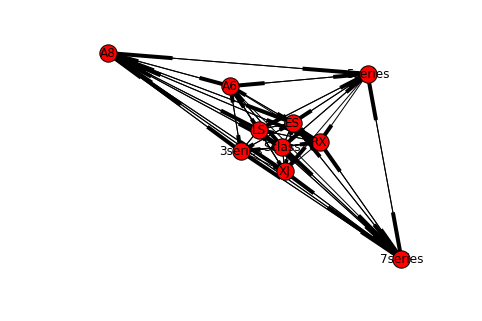

In [10]:
# Creating the weighted network
G = nx.DiGraph()

G.add_nodes_from(ss.columns)

for a,b,pos,neg in use:
    if pos!=0 :
        G.add_edge(b,a,{'weight':pos})
    if neg!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

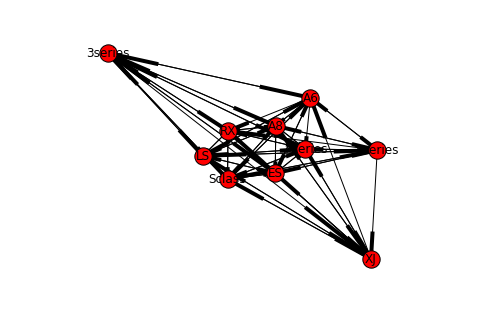

In [11]:
# Creating the unweighted network
G2 = nx.DiGraph()

G2.add_nodes_from(ss.columns)

for a,b,pos,neg in use:
    if pos!=0 :
        G2.add_edge(b,a)
    if neg!=0:
        G2.add_edge(a,b)
        
plt.figure()
nx.draw(G2, with_labels=True)
plt.show()

### Task B

Weighted and unweighted pageranks were calculated for the cars to determine their correlation with sales.

In [12]:
# Weighted pagerank
pr = nx.pagerank(G, alpha=1,weight='weight') # damping factor set to 1 since it is not applicable in case of reviews
pr_df = pd.DataFrame.from_dict(pr,orient='index')
pr_df = pr_df.reset_index()
pr_df.columns=['Model','pr']
pr_df

,Model,pr
0,XJ,0.071172
1,Sclass,0.104550
2,7series,0.100471
3,RX,0.106356
4,LS,0.112985
5,A6,0.066700
6,A8,0.098622
7,3series,0.142455
8,ES,0.110495
9,5series,0.086194


In [14]:
# Merging the sales with the pageranks
cs = pd.read_csv('car_sales.csv')
cs = cs.merge(pr_df)
cs

,Model,Sales,pr
0,A6,20000,0.066700
1,A8,12000,0.098622
2,3series,220000,0.142455
3,5series,60000,0.086194
4,7series,14000,0.100471
5,XJ,6600,0.071172
6,ES,135000,0.110495
7,LS,30000,0.112985
8,RX,120000,0.106356
9,Sclass,25000,0.104550


In [16]:
# Checking Pearson and Spearman correlations
import scipy
print cs.corr()
scipy.stats.spearmanr(cs['pr'], cs['Sales'])

          Sales        pr
Sales  1.000000  0.739425
pr     0.739425  1.000000


SpearmanrResult(correlation=0.72121212121212108, pvalue=0.018573155089460208)

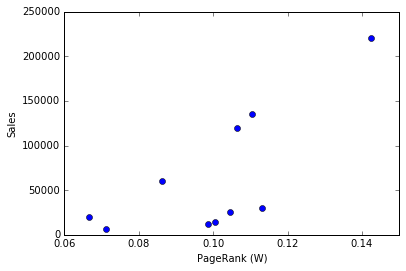

In [17]:
# Observing relationship between page rank and sales
plt.plot(cs['pr'], cs['Sales'], marker='o', linestyle='')
plt.xlabel("PageRank (W)")
plt.ylabel("Sales")

In [18]:
# Unweighted pagerank
pr2 = nx.pagerank(G2, alpha=1,weight='weight')
pr2_df = pd.DataFrame.from_dict(pr2,orient='index')
pr2_df = pr2_df.reset_index()
pr2_df.columns=['Model','pr2']
pr2_df

,Model,pr2
0,XJ,0.084499
1,Sclass,0.112254
2,7series,0.110868
3,RX,0.106909
4,LS,0.112254
5,A6,0.082711
6,A8,0.112254
7,3series,0.091907
8,ES,0.112254
9,5series,0.074089


In [19]:
# Merging the sales with the pageranks
cs2 = pd.read_csv('car_sales.csv')
cs2 = cs2.merge(pr2_df)
cs2

,Model,Sales,pr2
0,A6,20000,0.082711
1,A8,12000,0.112254
2,3series,220000,0.091907
3,5series,60000,0.074089
4,7series,14000,0.110868
5,XJ,6600,0.084499
6,ES,135000,0.112254
7,LS,30000,0.112254
8,RX,120000,0.106909
9,Sclass,25000,0.112254


In [20]:
# Checking Pearson and Spearman correlations
print cs2.corr()
scipy.stats.spearmanr(cs2['pr2'], cs2['Sales'])

          Sales       pr2
Sales  1.000000 -0.033835
pr2   -0.033835  1.000000


SpearmanrResult(correlation=0.0062530539948072242, pvalue=0.986321979214696)

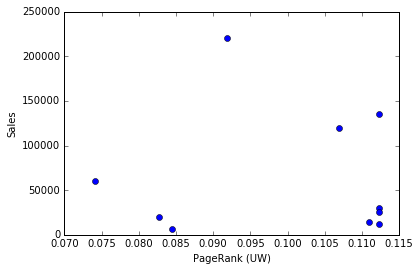

In [21]:
# Observing relationship between page rank and sales
plt.plot(cs2['pr2'], cs2['Sales'], marker='o', linestyle='')
plt.xlabel("PageRank (UW)")
plt.ylabel("Sales")

From the above, we can see that the weighted pagerank scores obtained from car reviews are strong indicators of their sales performance. Unweighted pagerank shows little to no indication. This is because weighted page ranks also capture how much better/worse one car is over another rather than assigning equal weights to every link.

### Task C

In [22]:
import pandas as pd
edmund = pd.read_csv('Assignment 3 Edmunds Posts.csv')

In [23]:
bmw = {'bmw3':'3series','bmw5':'5series','bmw7':'7series',
       'bmw 3':'3series','bmw 5':'5series','bmw 7':'7series','3 series':'3series','5 series':'5series','7 series':'7series'}

rep_dic = {'sc':'sclass','lexusls':'ls','lexuses':'es','mb':'mercedes','benz':'mercedes',"n't":'not'}

def repl(w,car_type_list):
#reviewers often refer to a specific car type by its brand; 
#if a reviewer only mentions 1 car type in a given brand within the same review, map the brand name into the car type
    l = []
    for ww in w:
        if ww in car_brand.keys() and len(set(car_brand[ww]).intersection(car_type_list))==1:
            l.append(list(set(car_brand[ww]).intersection(car_type_list))[0])
        else:
            l.append(ww)
    return l

def repl2(w):
#standardizing the name of car types and brands
    l=[]
    for ww in w:
        if ww in rep_dic.keys():
                l.append(rep_dic[ww])
        else:
                l.append(ww)
    return l

def multi_replace(text, dictionary):
#the phrases that reviewers use to describe specific BMW car types often contain spaces (eg: 7 series); 
#these phrases might be seperated when tokenized
#replacing BMW car types with 3series/5series/7series before tokenization to prevent them from being separated
    for i, j in dictionary.iteritems():
        text = text.replace(i, j)
    return text

In [24]:
#for each reivew, take out punctuation and stop words, and lemmentize
#if a car type is in the review, sum up the sentiments of 5 words before and after it
#the sum is the sentiment score of the car type in that review


from textblob import TextBlob
import re
import string

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()


car_type = ['es','ls','rx','a8','a6','3series','5series','7series','xj','sclass']
car_brand={'audi':['a6','a8'],'bmw':['3series','5series','7series'],'jaguar':'xj','lexus':['es','ls','rx'],'mercedes':'sclass'}
total_score = []

for review in edmund['Posts']:
    score = []
    words_lem = []
    review = multi_replace(review,bmw)
    review = re.sub('-','',review)
    #change words such as 3-series into 3series before tokenization
    review = nltk.word_tokenize(review.lower())
    review_words = [word for word in review if word not in set(string.punctuation)]
    filtered_words_sw = [word for word in review_words if word not in stopwords.words('english')]
    filtered_words_sw = repl2(filtered_words_sw)
    car_type_list=[]
    for u in filtered_words_sw:
        if u in car_type:
            car_type_list.append(u)
    filtered_words_sw =  repl(filtered_words_sw,car_type_list)
    filtered_poi = nltk.pos_tag(filtered_words_sw)
    wordnet_tag ={'NN':'n','JJ':'a','VB':'v','RB':'r'}
    for t in filtered_poi:
        try: words_lem.append(wnl.lemmatize(t[0],wordnet_tag[t[1][:2]]))
        except: words_lem.append(wnl.lemmatize(t[0]))
    #lemmatize words according to their PoS 
    for m in car_type:
        if m in words_lem:
                m_indices = [i for i, x in enumerate(words_lem) if x == m]
                m_senti = 0
                for num in m_indices:
                    if num <len(words_lem)-5:
                        m_string = ' '.join(words_lem[num-5:num+5])
                        m_senti += TextBlob(m_string).sentiment.polarity
                    else:
                        m_string = ' '.join(words_lem[num-5:])
                        m_senti += TextBlob(m_string).sentiment.polarity
                senti=m_senti
        else:
            senti = 0
        score.append(senti)
    
    total_score.append(score)

In [27]:
#After sentiment scores are generated for all the reviews and built into a table, 
#they are fed into the same prcoess in part b to calculate PageRank

score_df = pd.DataFrame(total_score)
score_df.columns=['ES','LS','RX','A8','A6','3series','5series','7series','XJ','Sclass']
score_diff = score_df.copy()
for i in range(len(score_df.columns)):
    for ii in range(i+1,len(score_df.columns)):
            temp = score_df.columns[i] +'_'+score_df.columns[ii]
            score_diff[temp]=score_df[score_df.columns[i]]-score_df[score_df.columns[ii]]

In [28]:
use_new = []
for q in score_diff.columns[10:]:
    p1,p2 = re.split('_',q)
    neg = (score_diff[q]<0)
    neg_sent  = score_diff[q][neg].sum()/score_diff[q][neg].count()
    pos = (score_diff[q]>0)
    pos_sent  = score_diff[q][pos].sum()/score_diff[q][pos].count()
    use_new.append((p1,p2,pos_sent,neg_sent))

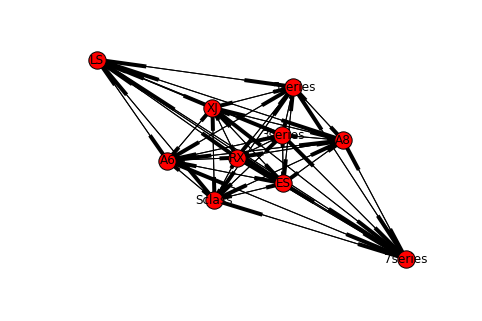

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(score_df.columns)

for a,b,pos,neg in use_new:
    if pos!=0 :
        G.add_edge(b,a,{'weight':pos})
    if neg!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [31]:
pr_new = nx.pagerank(G, alpha=1,weight='weight')
pr_new_df = pd.DataFrame.from_dict(pr_new,orient='index')
pr_new_df = pr_new_df.reset_index()
pr_new_df.columns=['Model','pr']
cs_new = pd.read_csv('car_sales.csv')
cs_new = cs_new.merge(pr_new_df)

In [32]:
cs_new[['Sales','pr']].corr(method='pearson', min_periods=1)

,Sales,pr
Sales,1.000000,0.611037
pr,0.611037,1.000000


In [33]:
cs_new[['Sales','pr']].corr(method='spearman', min_periods=1)

,Sales,pr
Sales,1.000000,0.624242
pr,0.624242,1.000000


The correlations, whether Pearson or Spearman, between the sales and the auto-generated sentiment are slightly above 60%, much lower than the manual sentiment. We should probably train a emotion lookup dictionary with corpus specific to cars. For example, words such as 'safe' and 'fast' are regarded as strongly positive.